In [72]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [16]:
#Load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Length of training dataset: 60000
Length of test set: 10000
Shape of sample: (28, 28)


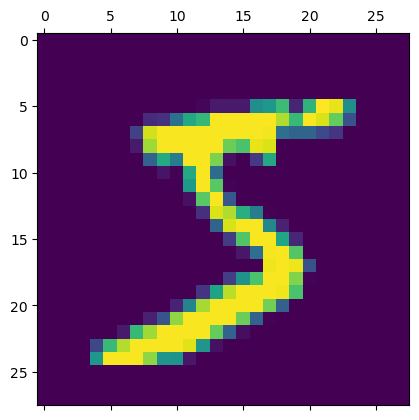

In [30]:
#Familiarize with dataset
print(f'Length of training dataset: {len(X_train)}\nLength of test set: {len(X_test)}')
print(f'Shape of sample: {X_train[0].shape}')

#Visual of sample 
plt.matshow(X_train[0])

In [49]:
#Flatten the dataset
X_train_flattened = X_train.reshape(len(X_train),28*28)/255
X_test_flattened = X_test.reshape(len(X_test),28*28)/255
print(f'New shape of X_train: {X_train_flattened.shape}. \nNew shape of X_test: {X_test_flattened.shape}.')

New shape of X_train: (60000, 784). 
New shape of X_test: (10000, 784).


In [52]:
#Model architecture
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)
print('Evaluate the model against our test dataset')
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4696 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9261
Evaluate the model against our test dataset
313/313 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.9263


[0.2678740322589874, 0.9262999892234802]

313/313 [==============================] - 0s 1ms/step
Predicted value for the first sample is 0


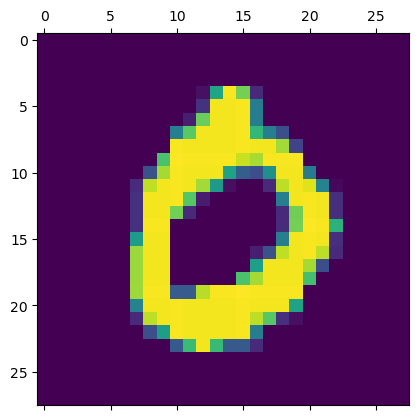

In [90]:
#Model prediction
plt.matshow(X_test[3])

y_pred = model.predict(X_test_flattened)
print
y_pred[3]
print(f'Predicted value for the first sample is {np.argmax(y_pred[3])}')

In [76]:
#Loop over the predicted values of all the test set and print first 5 sample predictions.
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

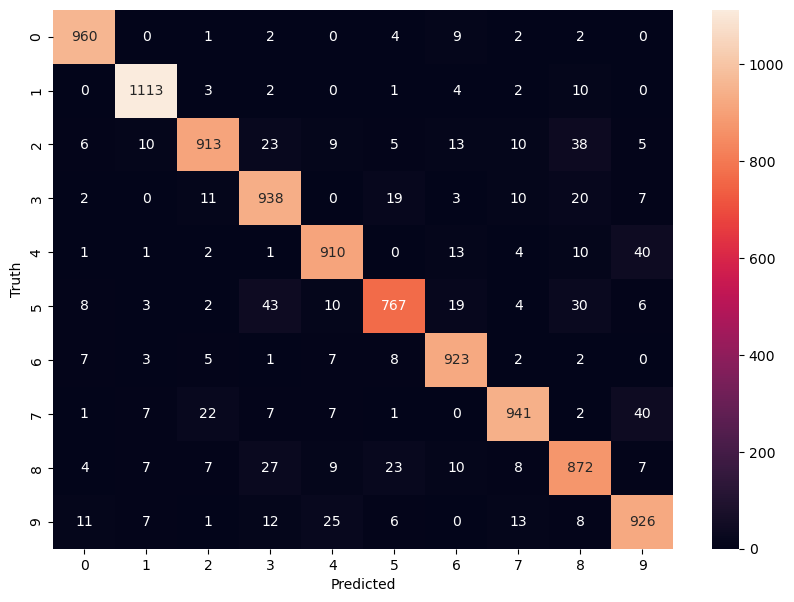

In [77]:
#Setup a confusion matrix to analyze model performance
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

#Plot confusion matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [92]:
#try new model with another hidden layer

#Model architecture
new_model = keras.Sequential([
    keras.layers.Dense(300, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

new_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

new_model.fit(X_train_flattened, y_train, epochs=15)
print('Evaluate the model against our test dataset')
new_model.evaluate(X_test_flattened, y_test)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2163 - accuracy: 0.9381
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0905 - accuracy: 0.9724
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9867
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

[0.07872159779071808, 0.9824000000953674]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

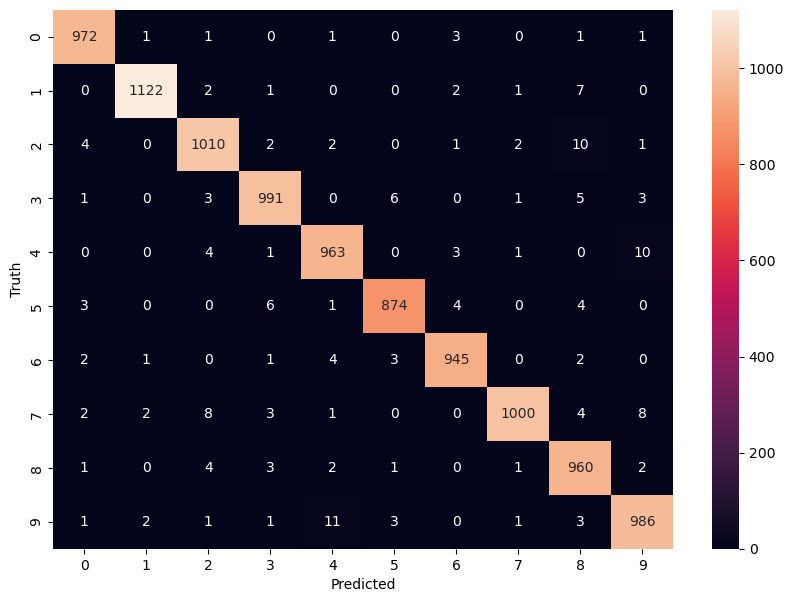

In [93]:
#New model Prediction
new_y_pred = new_model.predict(X_test_flattened)
new_y_predicted = [np.argmax(i) for i in new_y_pred]

                   
#New Confusion Matrix
new_cm = tf.math.confusion_matrix(labels=y_test, predictions=new_y_predicted)

#Plot confusion matrix
plt.figure(figsize = (10,7))
sn.heatmap(new_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
                   